<a href="https://colab.research.google.com/github/rdukewiesenb/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


## 1. Data Wrangling

In [1]:
import sys


# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 266kB 8.2MB/s 
     |████████████████████████████████| 3.1MB 19.5MB/s 
     |████████████████████████████████| 604kB 43.7MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 296kB 47.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=7cf2c643007f98a625aac959f90a3dab9f99a513892023f3ba67f2ae69227fda
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=bf0d78d92375f29cacc2377fc55c963d848aa8c037b1cb62aee9e61362490abd
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin image

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

##. 2. EDA

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Are there any NaNs?
# No...yay!
sample_submission.isnull().sum()

id              0
status_group    0
dtype: int64

## 3. Wrangle Function

In [8]:
[col for col in train.describe(include='object').columns if train[col].nunique() > 100]

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'subvillage',
 'lga',
 'ward',
 'scheme_name']

In [11]:
import numpy as np

def wrangle(x):
  x = x.copy()

  x['latitude'] = x['latitude'].replace(-2e-08, 0)

  cols_zeroes = ['latitude', 'longitude']
  for col in cols_zeroes:
    x[col] = x[col].replace(0, np.NaN)

  hi_card = [col for col in x.describe(include='object').columns
             if x[col].nunique() > 100]

  x = x.drop(['quantity_group'] + hi_card, axis=1)

  return x

In [12]:
train = wrangle(train)
test = wrangle(test)

## 4. Split Data

In [13]:
y = train['status_group']
X = train.drop(['status_group'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Baseline

In [15]:
print('Baseline Accuracy: ', y_train.value_counts(normalize=True).max())

Baseline Accuracy:  0.5429713804713805


## 6. Build Model 1

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from category_encoders import OneHotEncoder

In [21]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(n_jobs=-1)
)

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type',
                                     'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'wat...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False

In [23]:
coeffs = model.named_steps['logisticregression'].coef_
feature_names = model.named_steps['onehotencoder'].feature_names

In [25]:
sorted(list(zip(abs(coeffs[0]), feature_names)))

[(0.0, 'recorded_by_GeoData Consultants Ltd'),
 (0.00065056724617758, 'payment_pay when scheme fails'),
 (0.00065056724617758, 'payment_type_on failure'),
 (0.0008027970719734483, 'extraction_type_other - play pump'),
 (0.0010594732924960823, 'source_class_surface'),
 (0.0014859482038663502, 'extraction_type_submersible'),
 (0.0017611810659137876, 'extraction_type_group_other motorpump'),
 (0.0019635336198512436, 'extraction_type_group_other handpump'),
 (0.002461340926080088, 'extraction_type_group_swn 80'),
 (0.002461340926080088, 'extraction_type_swn 80'),
 (0.002749432517782767, 'source_class_groundwater'),
 (0.0028290378852546035, 'extraction_type_group_india mark iii'),
 (0.0028290378852546035, 'extraction_type_india mark iii'),
 (0.0028628873423504763, 'region_Mwanza'),
 (0.0031859280767136157, 'quality_group_colored'),
 (0.0031859280767136157, 'water_quality_coloured'),
 (0.003796757946655423, 'source_dam'),
 (0.003796757946655423, 'source_type_dam'),
 (0.004506778325383174, 'm

## 7. Check Metrics 1

In [28]:
print('Logistic Regression Training Accuracy: ', model.score(X_train, y_train))
print('Logistic Regression Validation Accuracy: ', model.score(X_val, y_val))

Logistic Regression Training Accuracy:  0.7338804713804714
Logistic Regression Validation Accuracy:  0.7308922558922559


## 8. Build Model 2

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
)

tree_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type',
                                     'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'wat...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                               

## 9. Check Metrics 2

In [29]:
print('Decision Tree Training Accuracy: ', tree_model.score(X_train, y_train))
print('Decision Tree Validation Accuracy: ', tree_model.score(X_val, y_val))

Decision Tree Training Accuracy:  1.0
Decision Tree Validation Accuracy:  0.7438552188552189


## 10. Visualize the Tree

In [30]:
# remember to include max depth


classifier = tree_model.named_steps['decisiontreeclassifier']
feature_names = tree_model.named_steps['onehotencoder'].feature_names

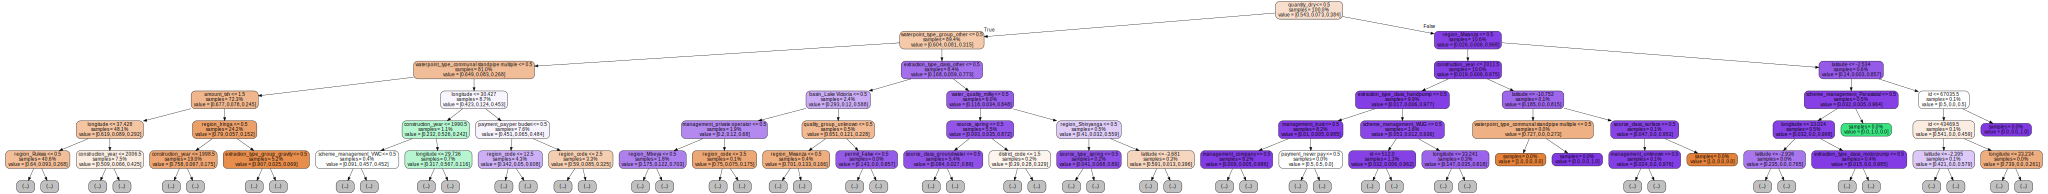

In [32]:
import graphviz
from sklearn.tree import export_graphviz

treeviz = export_graphviz(classifier,
                          out_file=None,
                          max_depth=5,
                          feature_names=feature_names,
                          impurity=False,
                          filled=True,
                          proportion=True,
                          rounded=True)

display(graphviz.Source(treeviz))

## 11. Feature Importance

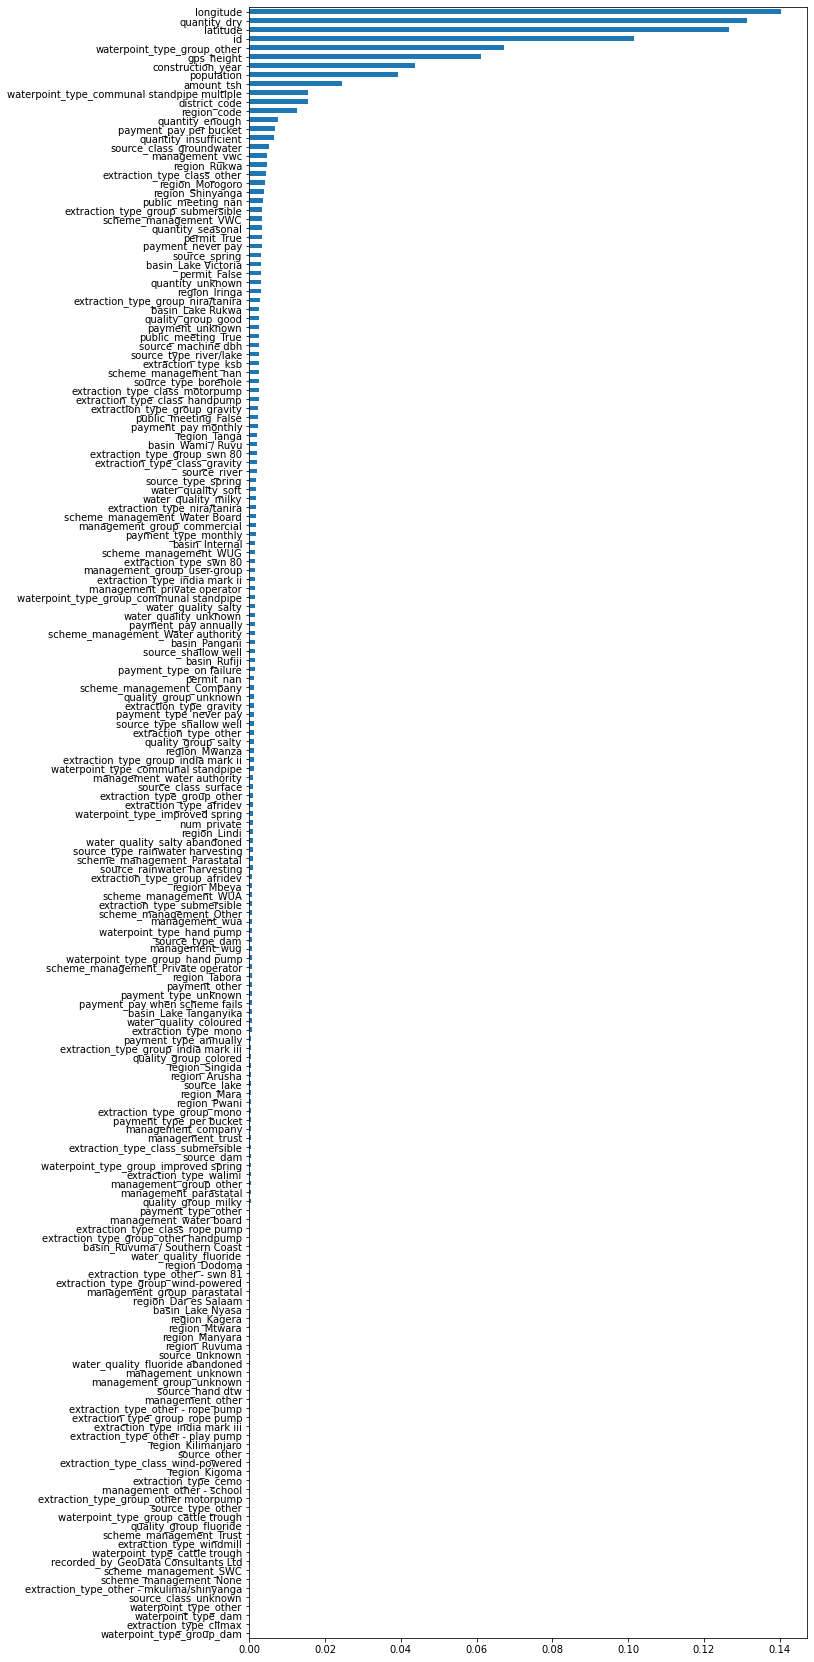

In [34]:
import matplotlib.pyplot as plt

feat_imps = classifier.feature_importances_
imps = pd.Series(feat_imps, index=feature_names)

plt.figure(figsize=(10, 30))
imps.sort_values().plot(kind='barh');